Implémentation de résolution numérique approchée de l'équation 1 :
$\frac{dy}{dx} = f(x,y), 
y(a) = A$
à l'aide d'un réseau de neurones avec une couche cachée et des
fonctions d'activation sigmoid

In [200]:
#imports
from numpy import pi, cos, sin, dot, vectorize, exp, zeros, linspace, sum
from numpy import sum as np_sum
from numpy.random import randn
from matplotlib.pyplot import plot, legend, title, show

Définition des fonctions de lecture et écritures des paramètres du réseau dans un fichier csv.
P : triplet contenant les vecteurs (w,b,v)

In [201]:
def save(P, filename) :
    w, b, v = P
    f = open(filename+".csv", 'w')
    for l in [w,b,v] :
        for i in range(len(l)) :
            f.write(str(l[i]))
            if i+1 != len(l) :
                f.write('; ')
        f.write('\n')
    f.close()

def load(filename) :
    f = open(filename+".csv")
    lines = f.readlines()
    f.close()
    floats = []
    for l in lines :
        valeurs = l.split(';')
        for v in valeurs :
            v = float(v)
        floats.append(np.array(valeurs, dtype='float64'))
    return floats[0],floats[1],floats[2]

Données du problème

In [202]:
#bornes de l'intervalle
xa = -1
xb = 1


#condition initiale
x0 = 0
A = 0

lamb = 0.3
W = 2*pi

def f(x,y) :
    return lamb*W*(y**2-1)

def df_dy(x,y) :
    #à modifier pour prendre f en argument et calculer automatiquement la dérivée
    """renvoie df/dy (x,y)"""
    return lamb*W*2*y

Fonction sigmoïde :
$\sigma(x) = \frac{1}{1+e^{-x}}$

In [203]:
def sig(x) :
    return 1/(1+exp(-x))

sig = vectorize(sig)

Fonctions calculant respectivement la sortie du réseau de neurones, l'erreur, et le gradient de l'erreur

In [204]:
def NN(x, w, b, v) :
    #Calcule la sortie du réseau de neurones
    z = x*w+b
    s = sig(z)
    return dot(s,v)


def calcError(w, b, v, X, H, m, x0) :
    #Calcule l'erreur
    E = 0
    for i in range(m) :

        s = sig(X[i]*w+b)
        e = dot(s,v)
        e += (X[i]-x0)*sum(v*w*(s-s**2))
        print("\tM'[", i,"]=",e, "target = ",f(X[i],A+(X[i]-x0)*dot(s,v)))
        e -= (f(X[i],A+(X[i]-x0)*dot(s,v)))
        E += e**2
        print("e**2", e**2)
    print("Error :",E/m)
    return E


def calcGrad(w, b, v, X, H, m, x0) :
    #calcule le gradient de l'erreur par rapport
    #aux 3 vecteurs représentant les paramètres
    grad_w = zeros(H)
    grad_b = zeros(H)
    grad_v = zeros(H)

    for i in range(m):

        s = sig(X[i]*w+b)
        df = df_dy(X[i], A+(X[i]-x0)*dot(s,v))

        e = dot(s,v)
        e += (X[i]-x0)*sum(v*w*(s-s**2))
        e -= (f(X[i], A+(X[i]-x0)*dot(s,v)))

        #w
        de_dw = 1 + (X[i]-x0)*(w*(1-2*s)-df)
        de_dw = X[i]*(s-s**2)*v*de_dw

        grad_w += 2*e*de_dw

        #b
        de_db = 1 + (X[i]-x0)*(w*(1-2*s)-df)
        de_db = (s-s**2)*v*de_db

        grad_b += 2*e*de_db

        #v
        de_dv = 1 + (X[i]-x0)*(w*(1-s)-df)
        de_dv = s*de_dv

        grad_v += 2*e*de_dv

    print("grad_w",grad_w/m)
    print("grad_w/2",grad_w/2/m)
    print("grad_b",grad_b/m)
    print("grad_v",grad_v/m)
    return grad_w, grad_b, grad_v


Définition des paramètres du modèle

In [205]:
m = 5 # nombre de points pour la variable indépendante
X = linspace(xa,xb,m) #liste des points de tests

H = 4 # nombre de noeuds de la couche cachée
epochs = 1 #nombre d'itérations
alpha = 5e-4 #taux d'apprentissage pour la descente de gradients

Initialisation des paramètres

In [206]:
#poids entre l'entrée et la couche cachée
w = randn((H))
#biais de la couche cachée
b = randn((H))
#poids entre la couche cachée et la sortie
v = randn((H))

In [207]:
from numpy import array
#poids entre l'entrée et la couche cachée
w = array([-0.24768037,  0.8043213,  -0.28434616, -0.20613563])
#biais de la couche cachée
b = zeros((H))
#poids entre la couche cachée et la sortie
v = array([-0.87000746, -0.63943005 ,0.75611365, 0.78101254])

Entraînement du modèle

In [208]:
for k in range(epochs) :
    if (k%500 == 0) :
        print("Erreur après",k,"itérations :", calcError(w, b, v, X, H, m, x0))
    gw,gb,gv = calcGrad(w, b, v, X, H, m, x0)
    
    w -= alpha*gw
    b -= alpha*gb
    v -= alpha*gv

	M'[ 0 ]= 0.3250929111028378 target =  -1.826693167272628
e**2 4.6301833270904655
	M'[ 1 ]= 0.17905046638472172 target =  -1.8804928559018332
e**2 4.24171869637514
	M'[ 2 ]= 0.01384434000000001 target =  -1.8849555921538759
e**2 3.605441182347563
	M'[ 3 ]= -0.1513617863847218 target =  -1.8826711049216622
e**2 2.9974319564528447
	M'[ 4 ]= -0.2974042311028377 target =  -1.8435997747880393
e**2 2.390720659311976
Error : 3.573099164315598
Erreur après 0 itérations : 17.86549582157799
grad_w [-0.14486179 -0.10215543  0.12574828  0.13019106]
grad_w/2 [-0.07243089 -0.05107771  0.06287414  0.06509553]
grad_b [-0.7436571  -0.4402885   0.64154288  0.67238338]
grad_v [1.7275565  1.82319258 1.7242356  1.73131467]


Affichage des résulats trouvés :

In [209]:
print()
print("Erreur finale après",epochs,"itérations",calcError(w, b, v, X, H, m, x0))
print("paramètres trouvés :",w,b,v)
#save((w,b,v), 'H = '+str(H)+', E = '+str(int(calcError(w, b, v))))


	M'[ 0 ]= 0.31576860099769055 target =  -1.832892840008414
e**2 4.6167459880664286
	M'[ 1 ]= 0.16944891825046848 target =  -1.881345112895049
e**2 4.205756158182082
	M'[ 2 ]= 0.003875039207972386 target =  -1.8849555921538759
e**2 3.5676811539707978
	M'[ 3 ]= -0.16163410196588848 target =  -1.8819578010981552
e**2 2.959513629796126
	M'[ 4 ]= -0.3077806966080161 target =  -1.8376848409413664
e**2 2.340606690848361
Error : 3.538060724172759
Erreur finale après 1 itérations 17.690303620863794
paramètres trouvés : [-0.24731822  0.80457669 -0.28466053 -0.20646111] [ 0.00185914  0.00110072 -0.00160386 -0.00168096] [-0.87432635 -0.64398803  0.75180306  0.77668425]


Affichage graphique de la solution trouvée :

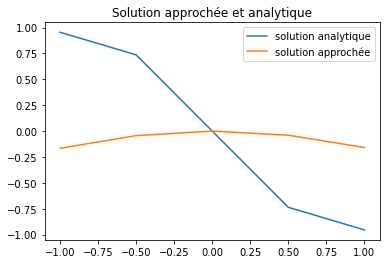

In [210]:
#solution trouvée
Y = [A + (X[i]-x0)*NN(X[i], w, b, v) for i in range(m)]

#solution analytique
K = (A-1) / (A+1)
Kexp = K*exp(2*lamb*W*X)
Z = (1+Kexp) / (1-Kexp)

plot(X,Z, label='solution analytique')
plot(X,Y, label='solution approchée')
legend()
title('Solution approchée et analytique')
show()